## DATA PRE-PROCESSING

In [ ]:
## import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## input data
df = pd.read_csv('hypothyroid.data', header=None)
## dataframe columns names
df.columns = ['hypothyroid', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 
                   'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH',
                   'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
df

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [ ]:
#df.info(verbose=True)

## DATA CLEANING AND PROCESSING
## checking if there are duplicates in the data and removing them
print('Przed oczyszczaniem: wiersze: ' + str(df.shape[0]) + ' kolumny: ' + str(df.shape[1]))
#print(df[df.duplicated()])
df = df.drop_duplicates()
## deleting lines with unknown gender
df = df[df.sex != '?']
## deletion of selected records from the column 'age' under the specified condition
df.loc[df['age'] == '?', ['age']] = 0
## complementing the missing values ​​in the appropriate columns (average values)
df['age'] = pd.to_numeric(df['age'])
df.loc[df['age'] == 0, ['age']] = df['age'].mean()
df['age'] = df['age'].round(0).astype(int)

for cols in df.columns.to_list()[15::2]:
  df.loc[df[cols] == '?', [cols]] = np.NaN
  df[cols] = pd.to_numeric(df[cols])
  df[cols].fillna((round(df[cols].mean(), 2)), inplace=True)
  
## checking if there is still an unknown value ('?')
for cols in df.columns.to_list():
  if(any(df[cols] == '?')):
    print("WYSTĘPUJĄ WARTOŚCI BRAKUJĄCE")
  
df = df.reset_index(drop=True)
print('Po oczyszczaniu: wiersze: ' + str(df.shape[0]) + ' kolumny: ' + str(df.shape[1]))

Przed oczyszczaniem: wiersze: 3163 kolumny: 26
Po oczyszczaniu: wiersze: 3013 kolumny: 26


In [ ]:
## data type conversion
"""
le = LabelEncoder()
def replace_to_logical(cols):
  for c in cols:
    le.fit(df[c])
    encode_le = le.transform(df[c])
    df[c] = encode_le

list_df = ['hypothyroid', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 
                   'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured',
                   'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
replace_to_logical(list_df)
"""
df = df.replace(['hypothyroid', 'M', 't', 'y'], 1)
df = df.replace(['negative', 'F', 'f', 'n'], 0)
df

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,30.88
1,1,15,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,30.88
2,1,24,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,30.88
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,30.88
4,1,77,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,30.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,0,58,0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,30.88
3009,0,29,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,30.88
3010,0,77,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,30.88
3011,0,74,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,30.88


## DATABASE SUMMARY

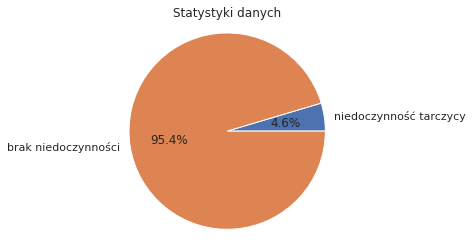

0    2874
1     139
Name: hypothyroid, dtype: int64

In [ ]:
## statistics of data belonging to specific classes (hypothyroidism or none)
df_pie = df['hypothyroid'].value_counts()
ht = df_pie.iloc[1]
neg = df_pie.iloc[0]
d = [ht, neg]
labels = ['niedoczynność tarczycy', 'brak niedoczynności']

plt.pie(d,labels=labels,autopct='%1.1f%%')
plt.title('Statystyki danych')
plt.axis('equal')
plt.show()

df['hypothyroid'].value_counts()

In [ ]:
df[["age","TSH","T3","TT4","T4U","FTI","TBG"]].describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,50.396283,5.821872,1.923817,108.269615,0.984348,111.725519,30.880040
std,18.135930,22.424645,0.852173,42.464621,0.209358,40.773255,5.392912
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,1.500000,85.000000,0.870000,92.000000,30.880000
50%,49.000000,1.000000,1.920000,106.000000,0.980000,109.000000,30.880000
75%,65.000000,5.820000,2.200000,124.000000,1.050000,125.000000,30.880000
max,98.000000,530.000000,10.200000,450.000000,2.210000,485.000000,122.000000


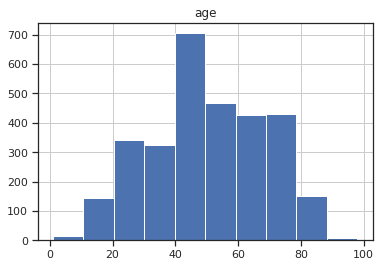

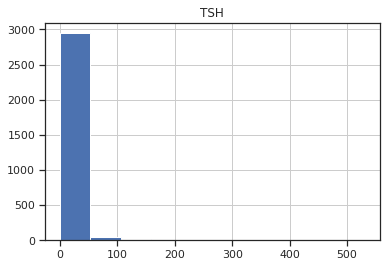

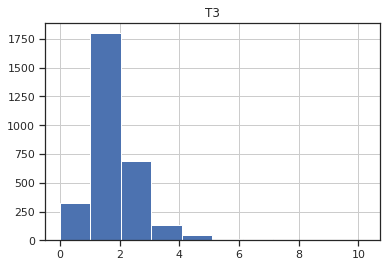

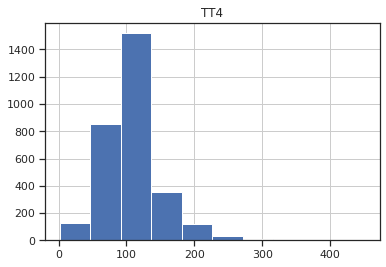

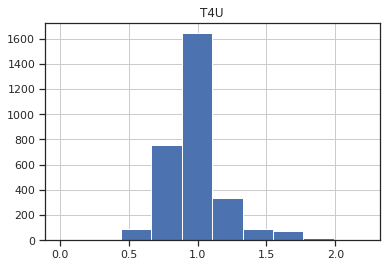

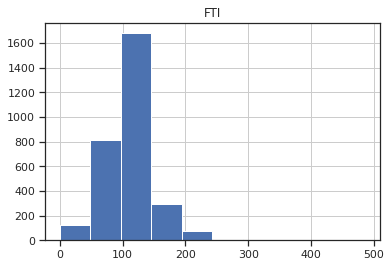

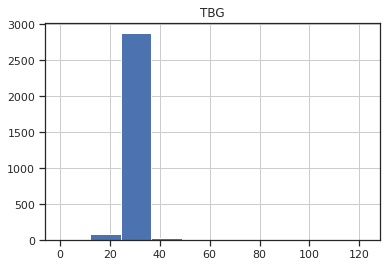

In [ ]:
for col in df[["age","TSH","T3","TT4","T4U","FTI","TBG"]]: 
  try:      
      df[col] = pd.to_numeric(df[col])       
      df.hist(column=col)      
  except ValueError:
      print('This column can not be represented as a histogram')

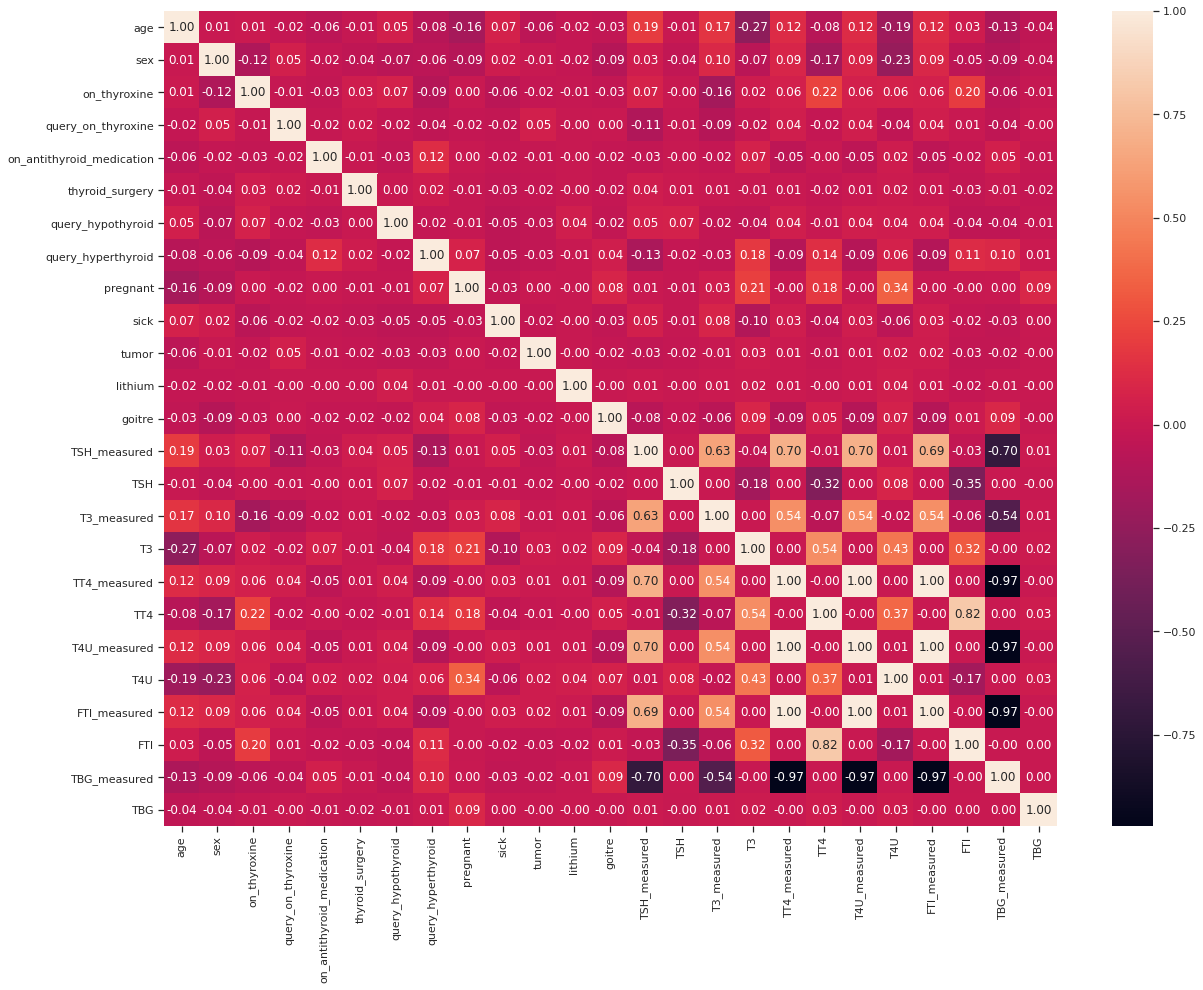

In [ ]:
plt.figure(figsize=(20,15))
corr = (df.iloc[:,1:]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

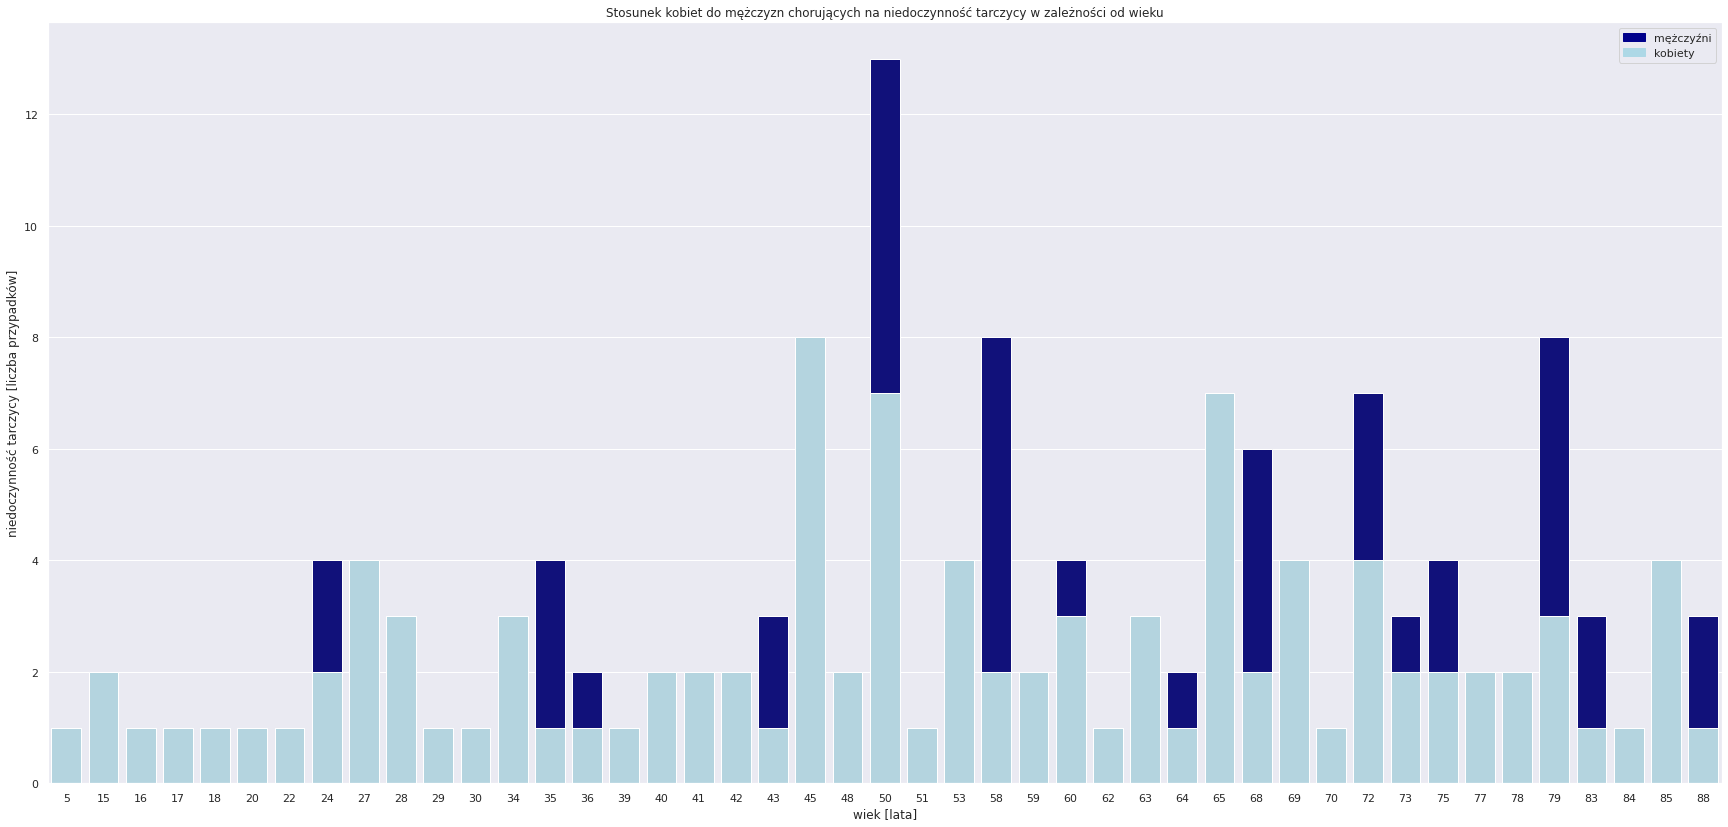

In [ ]:
## chart style setting: gray lines on background
sns.set(style="darkgrid")
## chart image dimensions
plt.figure(figsize=(30, 14))

## selecting data where hypothyroidism occurs
t = df[df['hypothyroid'] == 1]
## top bar -> sum of all values ​​(sex = 0 and sex = 1) to find the y position of the bars
total = t.groupby('age')['hypothyroid'].sum().reset_index()
## bar 1 -> top bar (male)
bar1 = sns.barplot(x="age",  y="hypothyroid", data=total, color='darkblue')
## bottom bar -> select only values ​​from "sex" column equal to 0 (female)
sex = t[t.sex == 0]
## bar 2 -> bottom bar (female)
bar2 = sns.barplot(x="age", y="hypothyroid", data=sex, estimator=sum, ci=None,  color='lightblue')

## adding legend and axle titles
top_bar = mpatches.Patch(color='darkblue', label='mężczyźni')
bottom_bar = mpatches.Patch(color='lightblue', label='kobiety')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('wiek [lata]')
plt.ylabel('niedoczynność tarczycy [liczba przypadków]')
plt.title('Stosunek kobiet do mężczyzn chorujących na niedoczynność tarczycy w zależności od wieku')

## wyświetlenie
plt.show()



## DIMENSIONALITY REDUCTION

In [ ]:
## reduction of the number of input variables
if len(df[df['hypothyroid'] == 0]) > len(df[df['hypothyroid'] == 1]):
  df_majority  = df[df['hypothyroid'] == 0]
  df_minority = df[df['hypothyroid'] == 1]
  val = 1
else:
  df_majority  = df[df['hypothyroid'] == 1]
  df_minority = df[df['hypothyroid'] == 0]
  val = 0

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df[df['hypothyroid']==val]), random_state=0)
data_downsampled = pd.concat([df_majority_downsampled, df_minority])

print('Po redukcji: ')
data_downsampled.hypothyroid.value_counts()

Po redukcji: 


1    139
0    139
Name: hypothyroid, dtype: int64

In [ ]:
## division into data and target
data = df.iloc[:,1:]
target = df.iloc[:,:1]

In [ ]:
## data normalization
scaler = MinMaxScaler()
data_n = scaler.fit_transform(data)

## principal components analysis in a data set
pca = PCA()
data_new = pca.fit_transform(data_n)

Text(0.5, 0, 'Główne składowe')

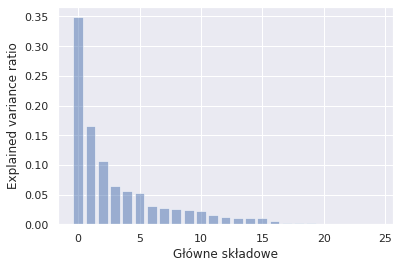

In [ ]:
## a graph of the percentage of variance assigned to each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.bar(range(25), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Główne składowe')

Text(0, 0.5, 'cumulative explained variance')

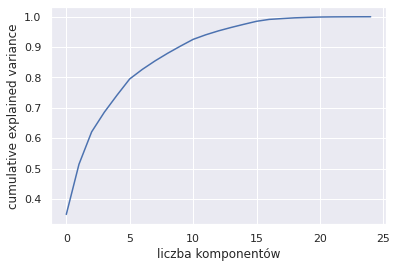

In [ ]:
## graph of the cumulative value of variance against the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('liczba komponentów')
plt.ylabel('cumulative explained variance')

In [ ]:
## division into training, validation and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(data, target, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.18)

print('Dane treningowe: ', round(x_train.shape[0]*100/data.shape[0],0), '% - ',  x_train.shape[0], 'rekordów')
print('Dane testowe: ', round(x_test.shape[0]*100/data.shape[0],0), '% - ', x_test.shape[0], 'rekordów')
print('Dane walidacyjne: ', round(x_val.shape[0]*100/data.shape[0],0), '% - ', x_val.shape[0], 'rekordów')

Dane treningowe:  70.0 % -  2100 rekordów
Dane testowe:  15.0 % -  452 rekordów
Dane walidacyjne:  15.0 % -  461 rekordów


In [ ]:
pca_c = PCA(n_components=2)
pca_cc = pca_c.fit_transform(x_train)
principal_Df = pd.DataFrame(data = pca_cc, columns = ['składowa główna 1', 'składowa główna 2'])
principal_Df['y'] = y_train.values
principal_Df

,składowa główna 1,składowa główna 2,y
0,8.231033,4.245189,0
1,-53.160296,-8.571949,0
2,-72.338909,-13.628661,0
3,18.386659,-9.791392,0
4,53.898401,-1.793817,0
...,...,...,...
2095,4.690786,-0.311779,0
2096,-121.004554,22.031326,1
2097,5.696822,-3.937179,0
2098,79.458127,3.949458,0


In [ ]:
print('Explained variation per principal component: {}'.format(pca_c.explained_variance_ratio_))

Explained variation per principal component: [0.73134126 0.10486177]


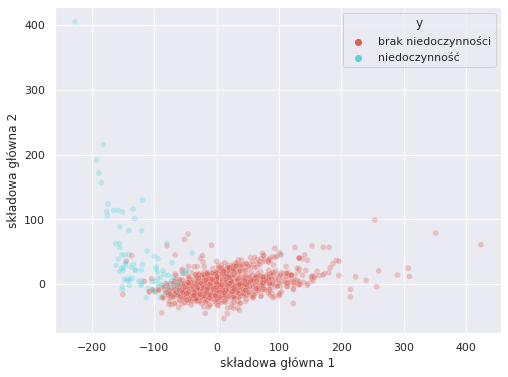

In [ ]:
label_dict = {
 0: 'brak niedoczynności',
 1: 'niedoczynność',
}

principal_Df = principal_Df.replace({'y': label_dict})

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="składowa główna 1", y="składowa główna 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=principal_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
#pca = PCA(0.95)
pca = PCA(n_components=5)
pca.fit(x_train)
print(pca.n_components_)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_val_pca = pca.transform(x_val)

5


## DATA CLASSIFICATION

In [ ]:
## classifier
clf = make_pipeline(RobustScaler(), SVC(C=10, kernel='rbf', gamma=0.1, decision_function_shape='ovo'))
#clf = GaussianNB()
#clf = KNeighborsClassifier(n_neighbors=3)

## training the model with the use of training data
clf.fit(x_train_pca, y_train.values.ravel())
y_pred = clf.predict(x_test_pca)

[[422   4]
 [  4  22]]


Text(0.5, 1.0, 'Confusion matrix')

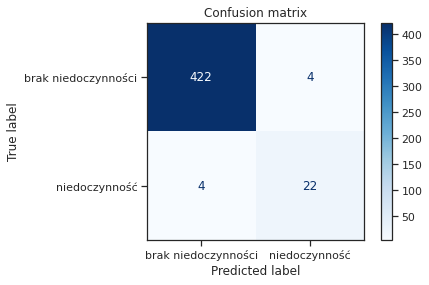

In [ ]:
## creating confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names=['brak niedoczynności', 'niedoczynność']
sns.set_style(style='ticks')
cmx = plot_confusion_matrix(clf, x_test_pca, y_test, labels=[0,1], display_labels=class_names, cmap=plt.cm.Blues, values_format=".0f")
cmx.ax_.set_title('Confusion matrix')

In [ ]:
## determining the value of metrics
def metrics_calc(y_true):
  f1 = f1_score(y_true, y_pred, average='weighted')
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)

  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('F1_score:', f1)
  print('Recall:', recall)

In [ ]:
metrics_calc(y_test)

Accuracy: 0.9823008849557522
Precision: 0.8461538461538461
F1_score: 0.9823008849557522
Recall: 0.8461538461538461


5X CROSVALIDATION VERSION

In [ ]:
data_new = pca.fit_transform(data)

## klasyfikator
clf = make_pipeline(RobustScaler(), SVC(C=10, kernel='rbf', gamma=0.1, decision_function_shape='ovo'))
#clf = GaussianNB()
#clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(clf, data_new, target.values.ravel(), 
                        scoring=['accuracy','f1','recall','precision'], cv=5)
y_pred = cross_val_predict(clf,data_new, target.values.ravel(), cv=5)

conf_mat = confusion_matrix(target, y_pred)

print(conf_mat)
print('Accuracy: ',mean(scores['test_accuracy']),'Precision',mean(scores['test_precision']), 'F1_score',mean(scores['test_f1']), 'Recall',mean(scores['test_recall']))